# DeltaDex Jupyter Notebook

In [4]:
from py_vollib.black_scholes.implied_volatility import implied_volatility as implied_vol

ModuleNotFoundError: No module named 'py_vollib'

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize_scalar   

$\frac{dS}{S} = \mu dt\:+\:\sigma dW_t\:+Jump ~~~~~~~~~~~~~~~~~(1) \\$
$S_0^{(n)} = S_0e^{(-\lambda k + n\mu_y + \frac{n\sigma^2_y}{2})} \\ \\ $
$ \\ \\ Jump = \begin{cases} 
Arrival - Poisson\\
Size - Lognormal
\end{cases} $

$C(S_0^{(n)}, T) = \sum^{M}_{n=0}C(S_0^{(n)},T\:|\: N_t = n)\cdot \frac{(\lambda T)^n}{n!}\cdot e^{-\lambda T} \\$
$M$ = 20 (empirically)

$C(S_0^{(n)}, T) = S_0^{(n)}N[d_1] - Ke^{-rT}N[d_2]$

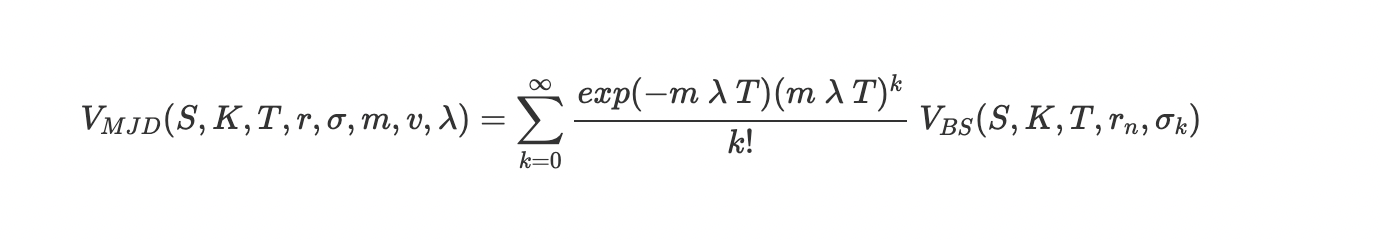

In [6]:
import sympy as sp
import sympy.stats

In [7]:
def BS_CALL(S, K, T, r, sigma):
    d1 = (sp.log(S/K) + (r + sigma**2/2)*T) / (sigma*sp.sqrt(T))
    d2 = d1 - sigma * sp.sqrt(T)
    return S * sp.stats.cdf(n)(d1) - K * sp.exp(-r*T)* sp.stats.cdf(n)(d2)

def delta_BS_CALL


def sp_merton_jump_call(S, K, T, r, sigma, m , v, lam):
    p = 0
    for k in range(1):
        r_k = r - lam*(m-1) + (k*sp.log(m) ) / T
        sigma_k = sp.sqrt( sigma**2 + (k* v** 2) / T)
        k_fact = sp.factorial(k)
        p += (sp.exp(-m*lam*T) * (m*lam*T)**k / (k_fact))  * BS_CALL(S, K, T, r_k, sigma_k)
    
    return p 

def delta_merton_jump_call(S, K, T, r, sigma, m , v, lam):
    p = 0
    for k in range(1):
        r_k = r - lam*(m-1) + (k*sp.log(m) ) / T
        sigma_k = sp.sqrt( sigma**2 + (k* v** 2) / T)
        k_fact = sp.factorial(k)
        p += (sp.exp(-m*lam*T) * (m*lam*T)**k / (k_fact))  * BS_CALL(S, K, T, r_k, sigma_k)
    
    return p 

SyntaxError: invalid syntax (<ipython-input-7-ca3bd2dcec34>, line 6)

In [ ]:
S, K, T, r, sigma, m, v, lam, Nd1, Nd2 = sp.symbols('S K T r sigma m v lambda N(d1) N(d2)')
# n = sympy.stats.Normal('n', 0, 1)


In [ ]:
def sp_call(S, K, T, sigma):
    F = S / (sp.exp(- r * T))
    d1 = (sp.log(F / K) + 0.5 * sigma**2 * T) / (sigma * sp.sqrt(T))
    d2 = (sp.log(F / K) - 0.5 * sigma**2 * T) / (sigma * sp.sqrt(T))
    res = sp.exp(-r * T) * (F * Nd1 - K * Nd2)
    return res

In [ ]:
sp_call(S,K,T,sigma)

(-K*N(d2) + N(d1)*S*exp(T*r))*exp(-T*r)

In [8]:
sp.diff(sp_call(S,K,T,sigma), S)

NameError: name 'sp_call' is not defined

In [9]:
JDMcall = sp_merton_jump_call(S, K, T, r, sigma, m, v, lam)
delta_JDMcall = sp.diff(JDMcall, S)
delta_JDMcall

NameError: name 'sp_merton_jump_call' is not defined

## Jump Diffusion Path Example:

Text(0.5, 1.0, 'Jump Diffusion Process')

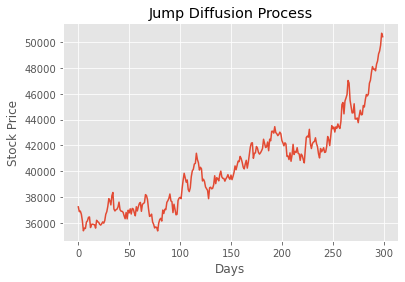

In [10]:
def merton_jump_paths(S, T, r, sigma,  lam, m, v, steps, Npaths):
    size=(steps,Npaths)
    dt = T/steps 
    poi_rv = np.multiply(np.random.poisson( lam*dt, size=size),
                         np.random.normal(m,v, size=size)).cumsum(axis=0)
    geo = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=size)), axis=0)
    
    return np.exp(geo+poi_rv)*S


S = 38000 # current stock price
T = 1 # time to maturity
r = 0.02 # risk free rate
m = 0 # meean of jump size
v = 0.3 # standard deviation of jump
lam =1 # intensity of jump i.e. number of jumps per annum
steps =300 # time steps
Npaths = 1 # number of paths to simulate
sigma = 0.2 # annaul standard deviation , for weiner process

j = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)

plt.plot(j)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process')

In [11]:
N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)    
    

def merton_jump_call(S, K, T, r, sigma, m , v, lam):
    p = 0
    for k in range(40):
        r_k = r - lam*(m-1) + (k*np.log(m) ) / T
        sigma_k = np.sqrt( sigma**2 + (k* v** 2) / T)
        k_fact = np.math.factorial(k)
        p += (np.exp(-m*lam*T) * (m*lam*T)**k / (k_fact))  * BS_CALL(S, K, T, r_k, sigma_k)
    
    return p 


def merton_jump_put(S, K, T, r, sigma, m , v, lam):
    p = 0 # price of option
    for k in range(40):
        r_k = r - lam*(m-1) + (k*np.log(m) ) / T
        sigma_k = np.sqrt( sigma**2 + (k* v** 2) / T)
        k_fact = np.math.factorial(k) # 
        p += (np.exp(-m*lam*T) * (m*lam*T)**k / (k_fact)) \
                    * BS_PUT(S, K, T, r_k, sigma_k)
    return p 

In [12]:
S = 38000 # current stock price
T = 0.5 # time to maturity
r = 0.05 # risk free rate
m = 0 # meean of jump size
v = 0.3 # standard deviation of jump
lam = 1 # intensity of jump i.e. number of jumps per annum
sigma = 0.2 # annaul standard deviation , for weiner process
K =38000
np.random.seed(3)

cf_price =  merton_jump_call(S, K, T, r, sigma, np.exp(m+v**2*0.5) , v, lam)

print('Merton Price =', cf_price)
# print('Monte Carlo Merton Price =', mcprice)
print('Black Scholes Price =', BS_CALL(S,K,T,r, sigma))



Merton Price = 3928.9619935510636
Black Scholes Price = 2617.7168595186376


In [13]:
S = 38000
strikes = np.arange(15000,55000,1000)
r = 0.05
m = 1 
v = 0.3
lam =1 
sigma = 0.2 
T= 1

mjd_prices = merton_jump_call(S, strikes, T, r, sigma, m, v, lam)
merton_ivs = [implied_vol(c, S, k, T, r, 'c') for c,k in zip(mjd_prices, strikes)]

plt.plot(strikes, merton_ivs, label='IV Smile')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')
plt.axvline(S, color='black', linestyle='dashed', linewidth=2,label="Spot price")
plt.title('MJD Volatility Smile')
plt.legend()

NameError: name 'implied_vol' is not defined

Interactive Volatility Smile in Jump Diffusion Model:

https://demonstrations.wolfram.com/ImpliedVolatilityInMertonsJumpDiffusionModel/
https://demonstrations.wolfram.com/OptionPricesInMertonsJumpDiffusionModel/

In [14]:
strikes = np.arange(25000,50000,1000)

maturities = np.arange(10., 335., 1.) /365


In [15]:
surf_mjd_prices = np.array([merton_jump_call(S, strikes, t, r, sigma, m, v, lam) for t in maturities])

# surf_merton_ivs = [implied_vol(c, S, k, T, r, 'c') for c,k in zip(surf_mjd_prices, strikes)]



In [16]:
maturities[30]

0.1095890410958904

In [17]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=strikes, y=maturities, z=surf_mjd_prices, colorscale='Earth',opacity=0.65),
                     ])
fig.update_layout(title='Volatility Surface', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90), )

fig.update_layout(scene = dict(
                    xaxis_title='Strike',
                    yaxis_title='Time to maturity',
                    zaxis_title='Call Option Price'),)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
S = 38000 # current stock price
T = 0.5 # time to maturity
r = 0.05 # risk free rate
m = 0.01 # mean of jump size
v = 0.005 # standard deviation of jump
lam = 10 # intensity of jump i.e. number of jumps per annum
sigma = 0.05 # annaul standard deviation , for weiner process
Npaths = 3
K = 38000
data = merton_jump_paths(S, T, r, sigma,  lam, m, v, steps, Npaths)[-1]

/Users/kirillbogomolov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.



<AxesSubplot:ylabel='Density'>

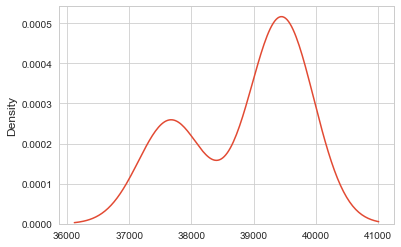

In [ ]:
import numpy as np
import seaborn as sns
# data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8
sns.set_style('whitegrid')
sns.kdeplot(np.array(data), bw=0.5)

In [ ]:
Assessing Vega risk: 

## Calibration process
### First step: trade

 User bought a call option (T, K, C). It means that a momentum appears and tries to change a volatility surface. It is very important change Implied Volatility value not only at one point on the surface, but also it should capture an area. 
 
$\alpha\:(K, T) $ is the initial impulse at the point on the Vol surface where Call option was bought. \
$\beta$ is the coefficient of linear decrease 

With this approach we take into account that every trade changes our volatility surface. 

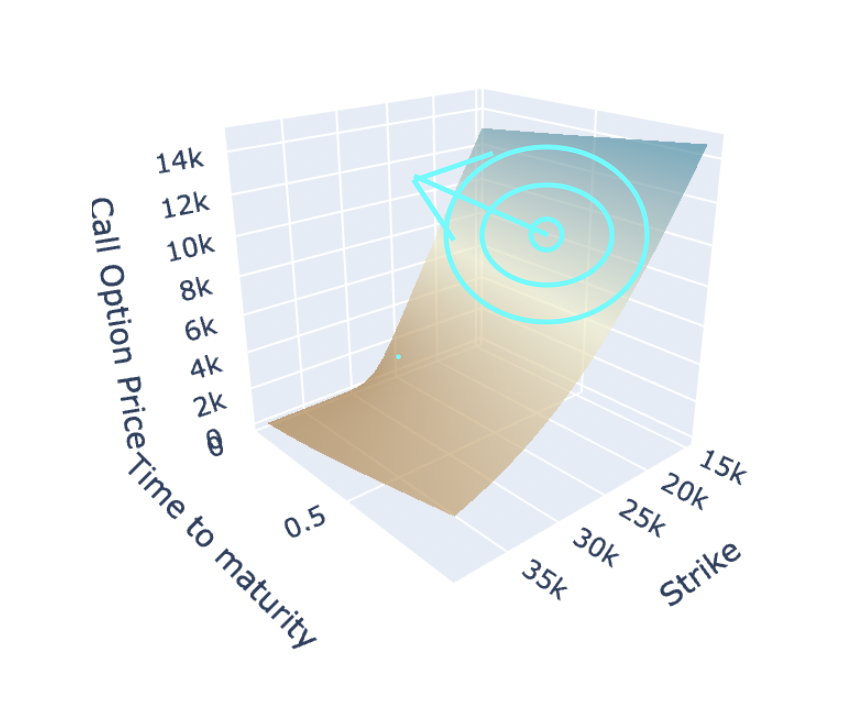

### Second step: onchain calibration

Now smart-contract must recalibrate a model to update the hyperparameters: $\{\sigma,\: \lambda,\: \mu_y,\: \sigma_y \}$

To perform this, smart-contract executes a 10 iterations of Adam optimizer and updates new hyperparameters. 

#### Even if it returns not exactly the most optimal parameters, smart-contract is close to it. And after the next trade it will try to capture better and better

## Delta hedging

$\Delta = \exp^{-rT}\cdot N(d_1)$

## Vega risk assessment

To calculate a vega risk, we calculate:

$\frac{\partial C}{\partial sigma}\cdot (ImpliedVol - 0) = \frac{\partial C}{\partial sigma}\cdot ImpliedVol$ 

For lower risk, we can asses a 95%-confidence interval

## Calculating Spread


F = $A\cdot ModelPrice + B\cdot H \cdot VegaExposure + C\cdot S_t$

Buy, Sell = ModelPrice ± F